In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()


../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# Read and preview data
# student = pd.read_csv('../resources/dataset_unab_ORIGINAL SIN P1.csv')
student = pd.read_csv('../resources/dataset_unab_P1.csv')

# df = df.rename({
#     't1':'Total Nivel 1',
#     'r1':'Cantidad de Reinicios Nivel 1',
#     'p1':'Cantidad de Pruebas Nivel 1',
#     's1':'Solución Nivel 1',
#     'l1':'Largo de la Solución',
#     't2':'Tiempo Total Nivel 2',
#     'r2':'Cantidad de reinicios Nivel 2',
#     'p2':'Cantidad de Pruebas del Nivel 2',
#     's2':'Solución generada nivel 2',
#     }, axis='columns')
# student.head()

In [4]:
student.describe()

,rut,r1,p1,l1,r2,p2,l2,r3,p3,l3,...,sv5,sv6,lt,pt,score,score_a,score_p,score_d,score_s,sol1
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,205.680851,2.297872,14.595745,9.106383,2.553191,11.106383,11.106383,2.553191,21.085106,21.106383,...,0.914894,0.808511,77.085106,67.978723,6.702128,4.085106,3.000000,2.212766,2.255319,5.710638
std,123.266432,2.661439,22.980767,3.885503,2.234206,10.449119,2.352002,2.093556,20.412943,8.665860,...,0.282057,0.397727,20.099567,43.044714,1.516789,1.265423,0.955533,0.858111,0.820076,1.332737
min,2.000000,1.000000,1.000000,7.000000,1.000000,3.000000,10.000000,1.000000,3.000000,16.000000,...,0.000000,0.000000,61.000000,19.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000
25%,100.000000,1.000000,2.000000,7.000000,1.000000,5.500000,10.000000,1.000000,9.000000,16.000000,...,1.000000,1.000000,65.000000,40.500000,6.000000,3.000000,2.000000,2.000000,2.000000,5.200000
50%,207.000000,1.000000,8.000000,7.000000,2.000000,9.000000,10.000000,2.000000,15.000000,17.000000,...,1.000000,1.000000,71.000000,52.000000,7.000000,4.000000,3.000000,2.000000,2.000000,6.100000
75%,290.500000,2.500000,15.500000,9.000000,3.000000,12.000000,10.000000,3.000000,21.500000,22.000000,...,1.000000,1.000000,80.500000,88.500000,8.000000,5.000000,4.000000,3.000000,3.000000,6.600000
max,451.000000,14.000000,130.000000,26.000000,11.000000,64.000000,19.000000,9.000000,90.000000,59.000000,...,1.000000,1.000000,144.000000,186.000000,10.000000,7.000000,5.000000,4.000000,3.000000,7.000000


In [5]:
student['aprobado']=student.apply(lambda x: funtions.set_int_aprobado(x['estado']),axis = 1 )

In [6]:
y = student['aprobado']
X = student[
    [
        'p1',
        'r1',
        'l1',
        'p2',
        'r2',
        'l2',
        'p3',
        'r3',
        'l3',
        'p4',
        'r4',
        'l4',
        'p5',
        'r5',
        'l5',
        'p6',
        'r6',
        'l6',
        'op1',
        'op2',
        'op3',
        'op4',
        'op5',
        'op6',
        'sv1',
        'sv2',
        'sv3',
        'sv4',
        'sv5',
        'sv6',
        'lt',
        'pt',
        'score',
        'score_a',
        'score_p',
        'score_d',
        'score_s',
        'sol1'
    ]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

In [8]:
model = RandomForestRegressor(random_state= 1502, n_estimators=200)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=1502)

In [9]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


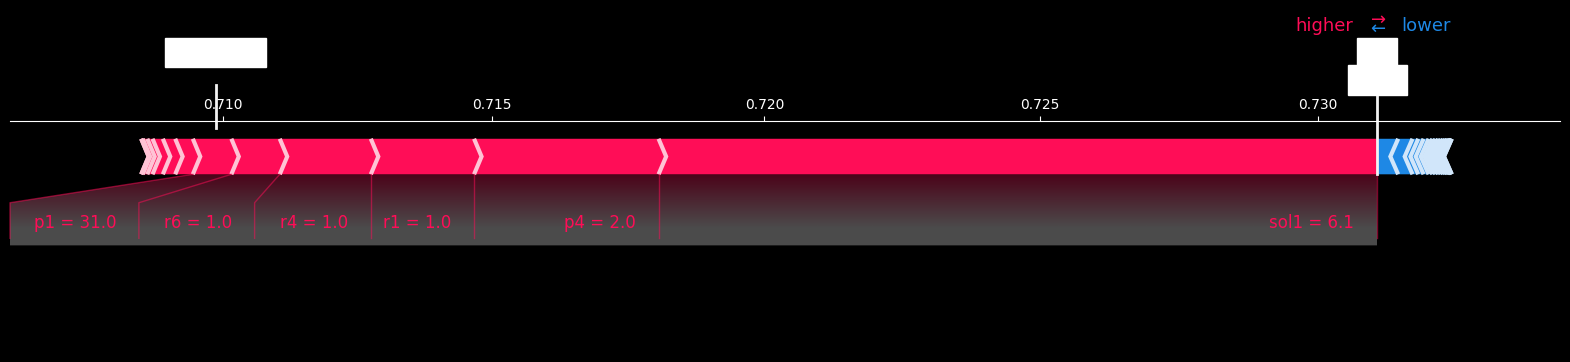

In [10]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], link='logit', matplotlib=True)

In [11]:
shap.force_plot(explainer.expected_value, shap_values, X_test, link='logit')


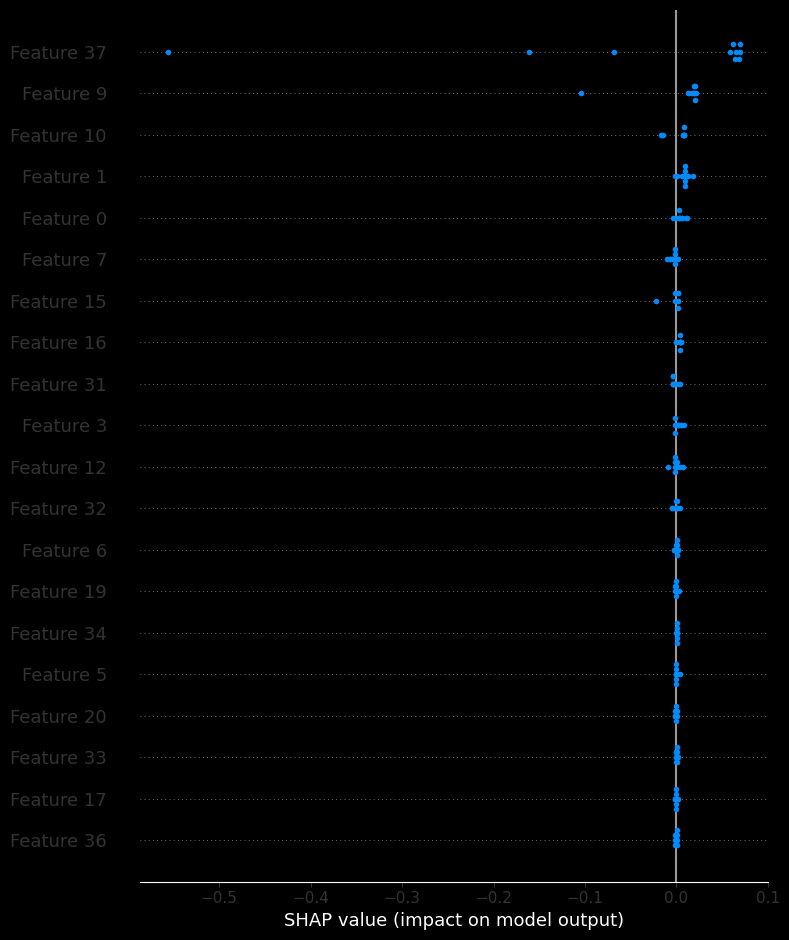

In [12]:
shap.summary_plot(shap_values)

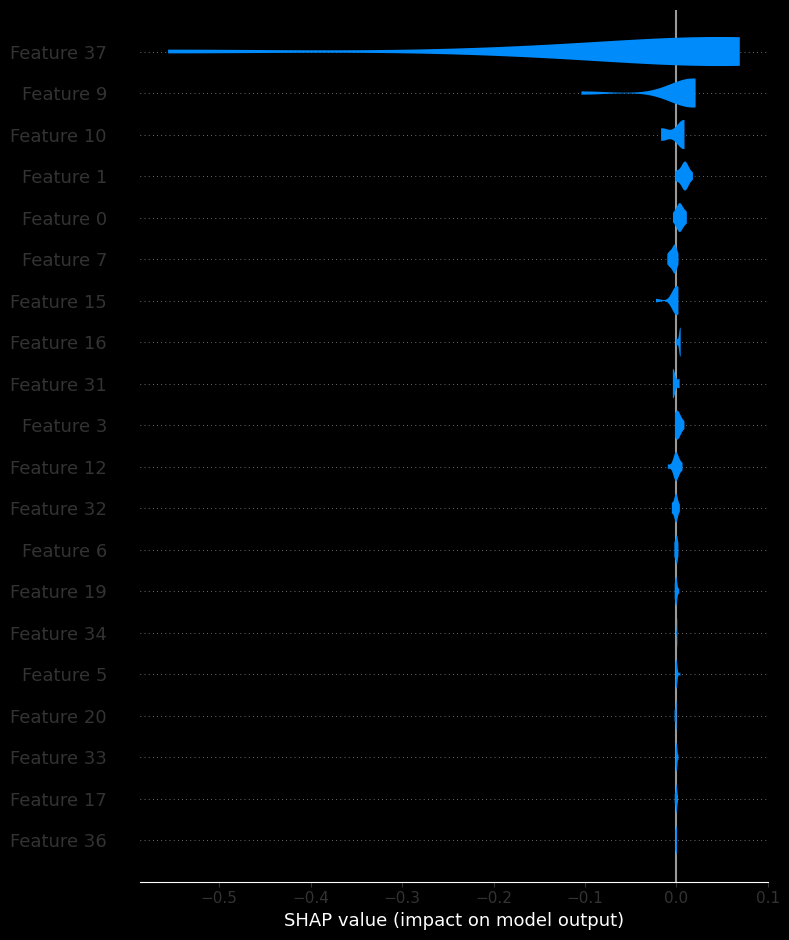

In [13]:
shap.summary_plot(shap_values, plot_type='violin')